# Лабораторная работа №5
## Ансамбли моделей машинного обучения

## Задание:
1. Выберите набор данных (датасет) для решения задачи классификации или регресии.
2. В случае необходимости проведите удаление или заполнение пропусков и кодирование категориальных признаков.
3. С использованием метода train_test_split разделите выборку на обучающую и тестовую.
4. Обучите следующие ансамблевые модели:
    - одну из моделей группы бэггинга (бэггинг или случайный лес или сверхслучайные деревья);
    - одну из моделей группы бустинга;
    - одну из моделей группы стекинга.
5. (+1 балл на экзамене) Дополнительно к указанным моделям обучите еще две модели:
    - Модель многослойного персептрона. По желанию, вместо библиотеки scikit-learn возможно использование библиотек TensorFlow, PyTorch или других аналогичных библиотек.
    - Модель МГУА с использованием библиотеки - https://github.com/kvoyager/GmdhPy (или аналогичных библиотек). Найдите такие параметры запуска модели, при которых она будет по крайней мере не хуже, чем одна из предыдущих ансамблевых моделей.
6. Оцените качество моделей с помощью одной из подходящих для задачи метрик. Сравните качество полученных моделей.

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Tuple
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import balanced_accuracy_score
from sklearn.tree import DecisionTreeClassifier
import graphviz 
from sklearn.tree import export_graphviz
from sklearn import tree
from operator import itemgetter
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression

In [103]:
data = pd.read_csv("Fuel.csv")

In [104]:
#Первые 5 записей датасета
data.head()

,Model Year,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption (City (L/100 km),Fuel Consumption(Hwy (L/100 km)),Fuel Consumption(Comb (L/100 km)),Fuel Consumption(Comb (mpg)),CO2 Emissions(g/km),CO2 Rating,Smog Rating
0,2022,Acura,ILX,Compact,2.4,4,AM8,Z,9.9,7.0,8.6,33,200,6,3
1,2022,Acura,MDX SH-AWD,SUV: Small,3.5,6,AS10,Z,12.6,9.4,11.2,25,263,4,5
2,2022,Acura,RDX SH-AWD,SUV: Small,2.0,4,AS10,Z,11.0,8.6,9.9,29,232,5,6
3,2022,Acura,RDX SH-AWD A-SPEC,SUV: Small,2.0,4,AS10,Z,11.3,9.1,10.3,27,242,5,6
4,2022,Acura,TLX SH-AWD,Compact,2.0,4,AS10,Z,11.2,8.0,9.8,29,230,5,7


In [105]:
#Проверка наличия пустых значений
data.isnull().sum()

Model Year                           0
Make                                 0
Model                                0
Vehicle Class                        0
Engine Size(L)                       0
Cylinders                            0
Transmission                         0
Fuel Type                            0
Fuel Consumption (City (L/100 km)    0
Fuel Consumption(Hwy (L/100 km))     0
Fuel Consumption(Comb (L/100 km))    0
Fuel Consumption(Comb (mpg))         0
CO2 Emissions(g/km)                  0
CO2 Rating                           0
Smog Rating                          0
dtype: int64

In [106]:
#Размер исходного датасета
data.shape

(946, 15)

In [107]:
#Проверка типов
data.dtypes

Model Year                             int64
Make                                  object
Model                                 object
Vehicle Class                         object
Engine Size(L)                       float64
Cylinders                              int64
Transmission                          object
Fuel Type                             object
Fuel Consumption (City (L/100 km)    float64
Fuel Consumption(Hwy (L/100 km))     float64
Fuel Consumption(Comb (L/100 km))    float64
Fuel Consumption(Comb (mpg))           int64
CO2 Emissions(g/km)                    int64
CO2 Rating                             int64
Smog Rating                            int64
dtype: object

In [108]:
#Удаление ненужных столбцов
data = data.drop(columns=["Model", "Model Year"], axis=1)

In [109]:
#Кодирование категориальных признаков
LE = LabelEncoder()
for column in ["Fuel Type","Make", "Vehicle Class", "Transmission"]:
    data[column] = LE.fit_transform(data[column])

<AxesSubplot:>

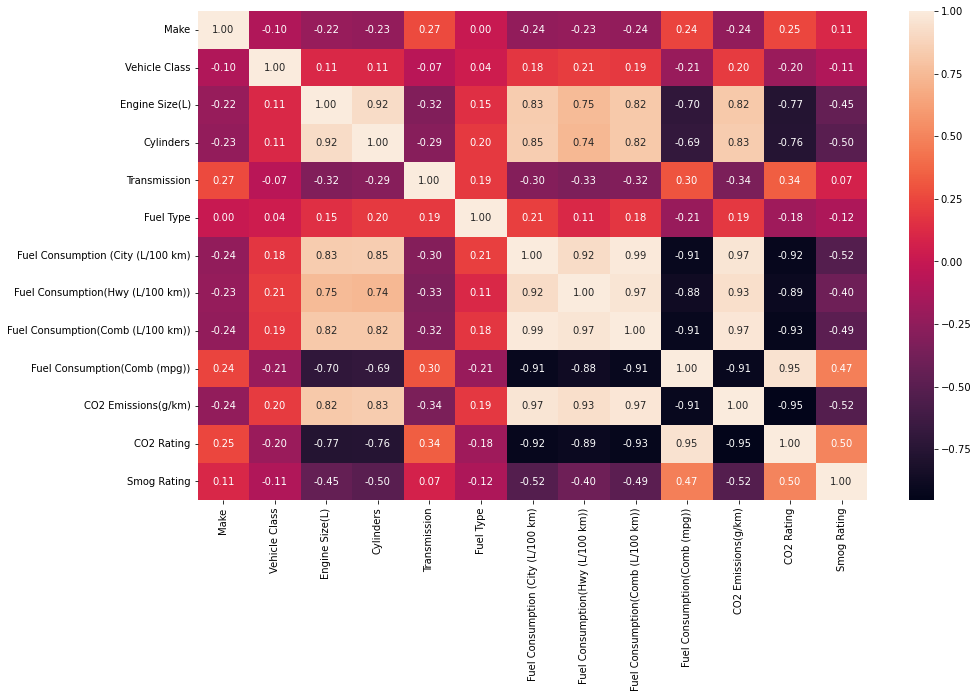

In [110]:
fig, ax = plt.subplots(figsize=(15,9))
sns.heatmap(data.corr(method='pearson'), ax=ax, annot=True, fmt='.2f')

In [111]:
#Выделяем записи, где присутствуют 4 или 6 цилиндров
#Для бинарной классификации
data = data.loc[data["Cylinders"].isin([4,6])]
data.shape

(699, 13)

In [112]:
xArray = data.drop("Cylinders", axis=1)
yArray = data["Cylinders"]

In [113]:
#Разделяем выборку для обучения модели
trainX, testX, trainY, testY = train_test_split(xArray, yArray, test_size=0.2, random_state=1)

## Случайный лес

In [114]:
from sklearn.ensemble import RandomForestClassifier

In [115]:
RForest = RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)
RForest.fit(trainX, trainY)

D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
D:\Anaconda\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


RandomForestClassifier(n_estimators=5, oob_score=True, random_state=10)

In [116]:
estimateRF = balanced_accuracy_score(testY, RForest.predict(testX))
estimateRF

0.9765625

In [117]:
nums = range(100,1000,100)
RForestarr = list()
for i in range(100,1000,100):
    RForest = RandomForestClassifier(n_estimators=i, oob_score=True, random_state=10)
    RForest.fit(trainX, trainY)
    RForestarr.append(balanced_accuracy_score(testY, RForest.predict(testX)))

In [118]:
RForestarr

[0.9765625,
 0.9765625,
 0.9765625,
 0.9765625,
 0.9765625,
 0.9765625,
 0.9765625,
 0.9765625,
 0.9765625]

## Boosting

In [119]:
GB = GradientBoostingClassifier(random_state=1)
GB.fit(trainX, trainY)

GradientBoostingClassifier(random_state=1)

In [120]:
balanced_accuracy_score(testY, GB.predict(testX))

0.9765625

## Stacking

In [121]:
base_learners = [
                 ('RF', RandomForestClassifier(n_estimators=10, random_state=1)),
                 ('GB', GradientBoostingClassifier(n_estimators=10, random_state=1))             
                ]

SC = StackingClassifier(estimators=base_learners, final_estimator=LogisticRegression())
SC.fit(trainX, trainY)

StackingClassifier(estimators=[('RF',
                                RandomForestClassifier(n_estimators=10,
                                                       random_state=1)),
                               ('GB',
                                GradientBoostingClassifier(n_estimators=10,
                                                           random_state=1))],
                   final_estimator=LogisticRegression())

In [122]:
balanced_accuracy_score(testY, SC.predict(testX))

0.9765625